<a href="https://colab.research.google.com/github/mequanent/HCC-2022/blob/main/Music%20Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
import pandas as pd
import numpy as np

#import urllib.request
import requests
from pandas.io.json import json_normalize


#url = 'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Baby.json.gz'
meta_url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Apps_for_Android.json.gz'
ratings_url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Apps_for_Android.csv"
reviews_url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Apps_for_Android_5.json.gz"

columns = ['reviewrID', 'asin', 'rating', 'reviewTime']

ratings_only = pd.read_csv(ratings_url, header=None)
ratings_only.columns = columns
app_reviews = pd.read_json(reviews_url, lines = True)
app_reviews
ratings_only

,reviewrID,asin,rating,reviewTime
0,AUI0OLXAB3KKT,B004A9SDD8,5.0,1301184000
1,A1ZUSQ3TC3EC4C,B004A9SDD8,5.0,1321574400
2,AC05OAXD72X1V,B004A9SDD8,4.0,1367366400
3,A2RVMFOKBVM21I,B004A9SDD8,5.0,1350172800
4,A3NBSRGUWQGCMZ,B004A9SDD8,1.0,1300838400
...,...,...,...,...
2638167,A1WKBCDSH3AORB,B00LY9GOLU,5.0,1405900800
2638168,A1WKBCDSH3AORB,B00LY9HZ3G,5.0,1405900800
2638169,AO7VN21R9P2MM,B00LZ9DVEM,5.0,1405987200
2638170,A3I9KEWNIJKOT0,B00M07JQQK,5.0,1405987200


In [ ]:
app_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1N4O8VOJZTDVB,B004A9SDD8,Annette Yancey,"[1, 1]","Loves the song, so he really couldn't wait to ...",3,Really cute,1383350400,"11 2, 2013"
1,A2HQWU6HUKIEC7,B004A9SDD8,"Audiobook lover ""Kathy""","[0, 0]","Oh, how my little grandson loves this app. He'...",5,2-year-old loves it,1323043200,"12 5, 2011"
2,A1SXASF6GYG96I,B004A9SDD8,Barbara Gibbs,"[0, 0]",I found this at a perfect time since my daught...,5,Fun game,1337558400,"05 21, 2012"
3,A2B54P9ZDYH167,B004A9SDD8,"Brooke Greenstreet ""Babylove""","[3, 4]",My 1 year old goes back to this game over and ...,5,We love our Monkeys!,1354752000,"12 6, 2012"
4,AFOFZDTX5UC6D,B004A9SDD8,C. Galindo,"[1, 1]",There are three different versions of the song...,5,This is my granddaughters favorite app on my K...,1391212800,"02 1, 2014"


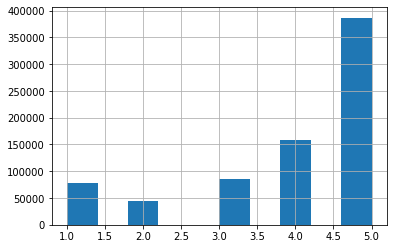

In [ ]:
app_reviews['overall'].hist()

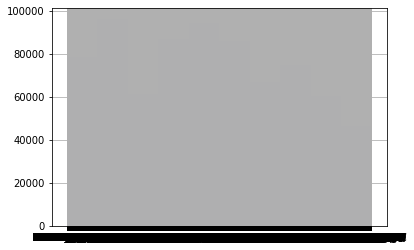

In [ ]:
app_reviews['asin'].hist()

In [ ]:
app_reviews.asin.value_counts()

B00FAPF5U0    6282
B0086700CM    4637
B00992CF6W    4018
B009UX2YAC    3814
B0064X7B4A    3763
              ... 
B004XVLYKC       5
B0075ADHVW       5
B00BSWJFJG       5
B00BTB2U0C       5
B006OIK688       5
Name: asin, Length: 13209, dtype: int64

In [ ]:
app_reviews.reviewerID.value_counts()

A1X1CEGHTHMBL1    565
ACX8G3IW95BNE     513
A2C05OHYJERICI    469
A3F3B6HY9RJI04    467
A1VM5Y6BL07X9X    338
                 ... 
A1GYYF3HYWAEEG      5
AO7H6I09PE6B        5
A3CHZRNREUVYJC      5
A2ZDP7TIPCWA0O      5
A3KMYI0CKNESQJ      5
Name: reviewerID, Length: 87271, dtype: int64

In [ ]:
app_reviews.reviewerName.value_counts()

Amazon Customer    17613
Kindle Customer     3092
jjceo                557
Unknown              531
me                   508
                   ...  
NiYa's Nook            1
MillerT                1
Heather Grow           1
B. Howard              1
Joan Reed              1
Name: reviewerName, Length: 74240, dtype: int64

In [ ]:
app_reviews.loc[:,['reviewerID', 'asin', 'overall']]

,reviewerID,asin,overall
0,A1N4O8VOJZTDVB,B004A9SDD8,3
1,A2HQWU6HUKIEC7,B004A9SDD8,5
2,A1SXASF6GYG96I,B004A9SDD8,5
3,A2B54P9ZDYH167,B004A9SDD8,5
4,AFOFZDTX5UC6D,B004A9SDD8,5
...,...,...,...
752932,AZJ11YS0E52AI,B00LUEMK44,5
752933,A2550XGZEFDH2Y,B00LUEMK44,3
752934,A1KNDB16TG5QXD,B00LUEMK44,4
752935,A1IHFHA5LI9SGI,B00LUEMK44,5


In [ ]:
columns = ['ReviewrID', 'asin', 'overall', 'reviewTime']
r = pd.read_csv(ratings_url, header = None)
r.columns = columns

In [ ]:
r

,ReviewrID,asin,overall,reviewTime
0,AUI0OLXAB3KKT,B004A9SDD8,5.0,1301184000
1,A1ZUSQ3TC3EC4C,B004A9SDD8,5.0,1321574400
2,AC05OAXD72X1V,B004A9SDD8,4.0,1367366400
3,A2RVMFOKBVM21I,B004A9SDD8,5.0,1350172800
4,A3NBSRGUWQGCMZ,B004A9SDD8,1.0,1300838400
...,...,...,...,...
2638167,A1WKBCDSH3AORB,B00LY9GOLU,5.0,1405900800
2638168,A1WKBCDSH3AORB,B00LY9HZ3G,5.0,1405900800
2638169,AO7VN21R9P2MM,B00LZ9DVEM,5.0,1405987200
2638170,A3I9KEWNIJKOT0,B00M07JQQK,5.0,1405987200


In [ ]:
image_url = 'http://snap.stanford.edu/data/amazon/productGraph/image_features/categoryFiles/image_features_Apps_for_Android.b'
meta_url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Apps_for_Android.json.gz'
meta_data = pd.read_json(meta_url, lines = True)
meta_data

ValueError: ignored